In [14]:
# Import Libraries
from tessa import Symbol, SymbolCollection, search
from datetime import date
import numpy as np
import pandas as pd

In [15]:
# Get today´s day in the right format
today = date.today()
d1 = today.strftime("%d/%m/%Y")
print(d1)

08/10/2023


('2023-04-08',
 <Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': '^IBEX'}, xlabel='date', ylabel='close'>)

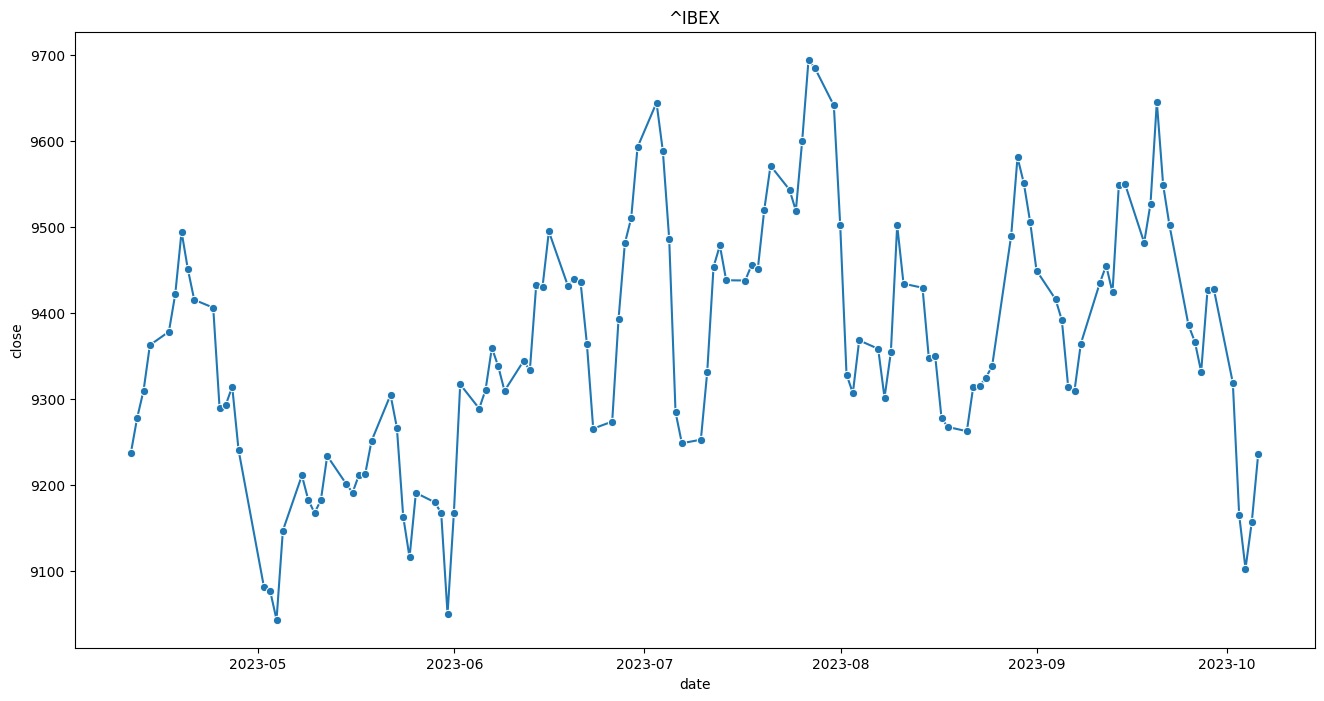

In [17]:
# Import latest price
s1 = Symbol("^IBEX")         # will use "Yahoo" as the default source
s1.price_graph() 